# Analisi della distribuzione di miscentering di ammassi 
 L'obiettivo di questa trattazione è di analizzare la distribuzione dei valori di miscentering di ammassi galattici provenienti dal satellite eRosita, per poi verificare la verosimiglianza tra tale distribuzione e due modelli forniti interpretando in seguito i risultati e i limiti dell’analisi.  
### Miscentering Distribution

La miscentering distribution corrisponde alla distanza normalizzata definita anche come offset, tra il centro dell'ammasso di galassie osservato in banda ottica e il centro del gas caldo dell'ammasso osservato in banda X. La distribuzione di questi offset fornisce la probabilità che il centro osservato di un ammasso sia spostato rispetto al suo centro reale, permettendo di migliorare le misure di massa e valutare le proprietà termodinamiche degli ammassi. 
Il telescopio spaziale eRosita, costruito dal Max Planck Institute for Extraterrestrial Physics (MPE) in Germania, fornisce un catalogo dettagliato degli ammassi di galassie. 
Per questa analisi ci soffermeremo su tre informazioni principali estratte dal catalogo: 

- il **redshift** indicato come BEST_Z, il quale rappresenta la distanza alla quale si osserva un corpo celeste, di conseguenza più    guardiamo indietro nel tempo e più alto sarà il redshift;
- la **massa** espressa come logaritmo della massa dell’ammasso di galassie in unità di massa solare indicata come LogM500;
- la **distanza normalizzata** in unità di raggio solare definita BCG_offset_R500.

## I) Analisi del catalogo: 
Per eseguire un'analisi approfondita degli offset è d'obbligo importare tutte le librerie necessarie e caricare il catologo fornito da eRosita: 

In [411]:
import pandas as pd #per la gestione dei dataset strutturati 
import numpy as np #per le operazioni matematiche e statistiche 
import matplotlib.pyplot as plt #per rappresentare i dati mediante grafici 
import seaborn as sns #per ottimizzare i grafici e l'analisi statistica 
import emcee #per stimare i parametri dei modelli  

# Caricare il dataset:
file_path = "catalog_selected_columns_filtered_with_cluster_index.csv"
df = pd.read_csv(file_path)
# Mostrare le prime righe per verificarne il contenuto:
df.head()


,Unnamed: 0,NAME,RA_XFIT,DEC_XFIT,M500,R500,RA_OPT,DEC_OPT,RA_BCG,DEC_BCG,...,X_scaled_0,X_scaled_1,cluster,rho_m,rho_s,sigma0_m,sigma0_s,sigma1_m,sigma1_s,logM500
0,0,1eRASS J000005.2-383729,0.0214,-38.6250,36.07,971.0,0.0238,-38.626781,0.0238,-38.626781,...,-0.081623,0.778435,6,0.750582,0.027508,0.100183,0.007995,0.668959,0.040839,14.557146
1,1,1eRASS J000021.4-824954,0.0558,-82.8189,16.99,819.0,0.1768,-82.798203,0.1768,-82.798203,...,-1.230286,-0.425019,7,0.726530,0.026114,0.062899,0.005056,0.606223,0.031481,14.230193
2,2,1eRASS J000031.8-630131,0.1265,-63.0225,22.04,846.0,0.1254,-63.023071,0.1254,-63.023071,...,-0.439542,-0.046329,9,0.809312,0.024625,0.089089,0.006957,0.578245,0.038856,14.343212
3,3,1eRASS J000056.7-682010,0.2309,-68.3369,14.25,732.0,0.2301,-68.336777,0.1765,-68.372871,...,-0.456453,-0.657230,26,0.779278,0.026525,0.103519,0.008066,0.620830,0.038000,14.153815
4,4,1eRASS J000104.0-464435,0.2768,-46.7381,23.84,891.0,0.2840,-46.734661,0.2840,-46.734661,...,-0.809294,0.075927,22,0.779619,0.029719,0.058439,0.005577,0.514526,0.037597,14.377306


Qui di seguito le colonne di nostro maggior interesse:  

In [412]:
df[["BEST_Z", "logM500", "BCG_offset_R500"]]



,BEST_Z,logM500,BCG_offset_R500
0,0.31528,14.557146,0.044778
1,0.08909,14.230193,0.189587
2,0.24480,14.343212,0.012553
3,0.24147,14.153815,0.781392
4,0.17199,14.377306,0.071918
...,...,...,...
7562,0.19926,14.061075,0.585099
7563,0.38619,14.338855,0.081668
7564,0.10523,14.587374,0.430328
7565,0.11380,14.149527,0.015736


È possibile avere delle informazioni più dettagliate sui valori forniti dal catalogo tramite il seguente comando: 

In [413]:
df[["BEST_Z", "logM500", "BCG_offset_R500"]].describe() 

,BEST_Z,logM500,BCG_offset_R500
count,7567.000000,7567.000000,7567.000000
mean,0.331353,14.314848,0.317392
std,0.196929,0.309311,0.439892
min,0.050020,12.740363,0.000831
25%,0.181605,14.136721,0.048115
50%,0.295710,14.330819,0.121174
75%,0.438330,14.516469,0.399448
max,1.141850,15.208898,4.498073


Quello che si può osservare è che in tutto sono state prese 7567 misure di offset e il valor medio di queste corrisponde a circa 0.32, un valore molto distante dal picco massimo corrispondente a 4,5. Il motivo verrà spiegato nella sezione successiva. 


### Distribuzione delle distanze normalizzate: 
Una prima analisi da condurre consiste nel verificare la distribuzione degli offset costruendo un istogramma per identificare l'intervallo in cui si concentra la densità degli offset misurati. Dal grafico sottostante emerge che la maggior parte delle distanze normalizzate ha valori relativamente bassi con un picco importante compreso tra 0 e 0,1. Questa distribuzione può essere interpretata come segue:

- offset "grandi": indicano ammassi non "rilassati" cioè in fase di evoluzione dinamica attiva, come ad esempio durante un processo di fusione, che tende a far muovere insieme il gas caldo e le galassie.
- offset "piccoli": suggeriscono ammassi "rilassati" dal punto di vista dinamico quindi più stabili e in equilibrio.

È dunque più semplice osservare ammassi di galassie che sono in equilibrio dinamico e quindi più evoluti, piuttosto che ammassi ancora coinvolti in processi dinamici intensi.

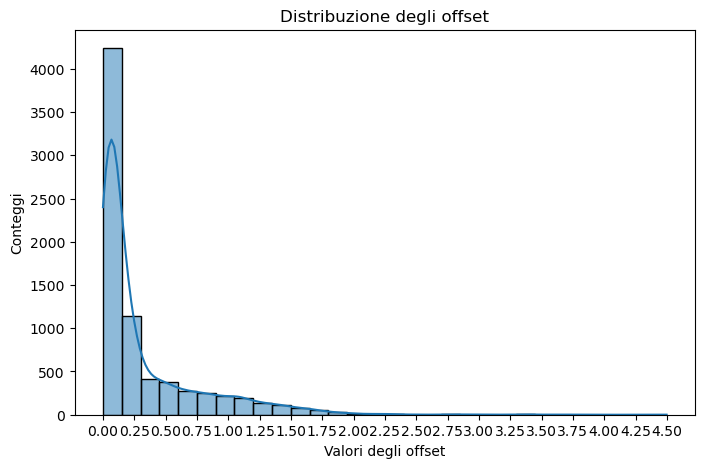

In [414]:
import matplotlib.ticker as ticker #per aumentare il numero di valori sull'asse delle ascisse 
#Analizzo la distribuzione della distanza normalizzata 
plt.figure(figsize=(8,5))
ax = sns.histplot(df["BCG_offset_R500"], bins=30, kde=True)
plt.xlabel("Valori degli offset")
plt.ylabel("Conteggi")
plt.title("Distribuzione degli offset")

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))
plt.show()


## Distribuzione degli offset in funzione della massa 
Osservando il grafico sottostante si può intuire che la maggior parte delle distanze, in particolare quelle comprese tra 0 e 1,5, sono concentrate su valori di masse elevate, tra 13,5 e 14,0, mentre gli offset maggiori si trovano a masse inferiori. Questa distribuzione appare abbastanza plausibile poiché le galassie più massicce possiedono un potenziale gravitazionale più forte, che le rende più centrali all'interno dell'ammasso e favorisce un allineamento più stretto del gas caldo, soggetto alla loro gravità. Inoltre, le galassie più massicce sono anche più vecchie, il che implica che abbiano avuto più tempo per raggiungere l'equilibrio idrostatico con l'ammasso. Al contrario, le galassie di massa inferiore sono più facilmente coinvolte in processi di fusione o perturbazioni dovute ad altre galassie o al gas caldo circostante. Essendo soggette a un potenziale gravitazionale minore, sia le galassie che il gas sono più suscettibili a spostamenti rispetto al centro dell'ammasso.

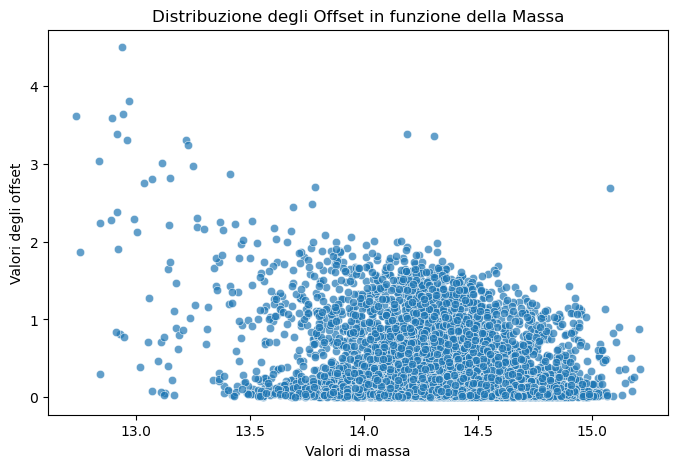

In [415]:
#Distanza normalizzata in funzione della massa 
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["logM500"], y=df["BCG_offset_R500"], alpha=0.7)
plt.xlabel("Valori di massa")
plt.ylabel("Valori degli offset")
plt.title("Distribuzione degli Offset in funzione della Massa")
plt.show()


## Distribuzione degli offset in funzione del redshift
Da questo grafico invece si può evincere che gran parte delle misure, sia per offset maggiori che minori, sono concetrate attorno a redshift più piccoli. Questo tipo di andamento potrebbe essere speigato dai seguenti motivi: 
- Ammassi di galassie a redshift basso sono più facili da osservare e studiare rispetto a quelli a redshift elevato. I telescopi e le tecniche di osservazione attuali sono più efficienti nel rilevare e mappare oggetti più vicini (con redshift basso). Questo è principalmente dovuto alla maggiore luminosità e dimensione apparente degli ammassi di galassie a distanze più basse, che li rendono più facili da osservare.
D'altra parte i campioni di galassie a redshift elevato sono più rari e difficili da identificare a causa della loro debole luminosità e della difficoltà di distinguere la struttura dell'ammasso a distanze così grandi. 
- Ammassi di galassie a redshift alto sono meno evoluti rispetto a quelli a redshift basso. Infatti a redshift alti gli ammassi di galassie erano ancora in fase di formazione o evoluzione. Il gas caldo che circonda queste galassie potrebbe non essersi distribuito in modo stabile come nei sistemi a redshift basso. Quindi, è più difficile osservare una struttura chiara e ben definita del gas caldo nei primi stadi di evoluzione degli ammassi.



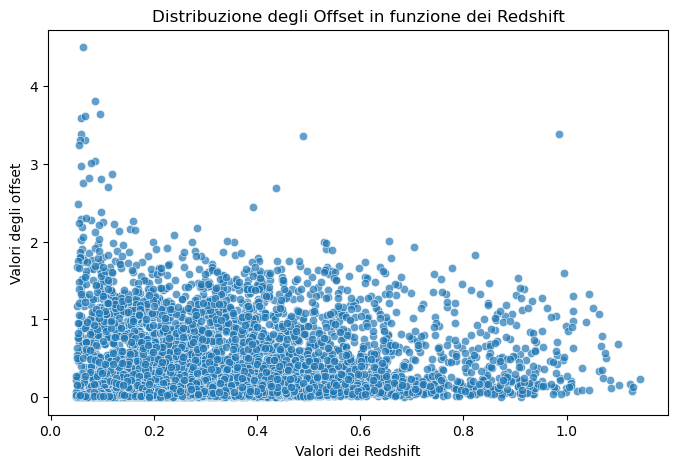

In [416]:
#Distanza normalizzata in funzione del redshift 
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["BEST_Z"], y=df["BCG_offset_R500"], alpha=0.7)
plt.xlabel("Valori dei Redshift")
plt.ylabel("Valori degli offset")
plt.title("Distribuzione degli Offset in funzione dei Redshift")
plt.show()


## II) Sviluppo del primo modello
Il passo successivo è quello di sviluppare dei modelli capaci di predire la distribuzione inizialmente osservata degli offset.
Definiamo con "x" i valori della distanza normalizzata forniti dal catalogo; il primo modello da verificare è il seguente: 

\begin{equation}
    P(x|\rho,\sigma_{0},\sigma_{1}) = \rho \frac{x}{\sigma_{0}^2} \exp\left(-0.5 \left(\frac{x}{\sigma_0}\right)^2\right) + (1-\rho) \frac{x}{\sigma_{1}^2} \exp\left(-0.5 \left(\frac{x}{\sigma_{1}}\right)^2\right)
\end{equation}

In questo modello $\rho$ indica la frazione degli ammassi ben centrati e $1-\rho$  la frazione degli ammassi centrati erroneamente. 

Si definisce quindi il modello costruendo una funzione chiamata mixture_model dipendente dalla variabile x e dai tre parametri $\rho$, $\sigma_0$ e $\sigma_1$: 


In [417]:
def mixture_model(x, rho, sigma0, sigma1):
    return (rho*(x/(sigma0)**2)*np.exp(-0.5*(x/sigma0)**2)) + ((x/(sigma1)**2)*(1-rho)*np.exp(-0.5*(x/sigma1)**2))

Per poter chiarire l'andamento di tale modello rispetto alla distribuzione osservata è necessario stimare dei valori iniziali per i parametri $\rho$, $\sigma_0$ e $\sigma_1$. Ciò è possibile farlo in diversi modi. In questo caso è stato deciso di calcolare i valori per $\sigma_0$ e $\sigma_1$ tramite il metodo dei percentili; mediante una funzione chiamata "estimate_params_with_percentiles" si calcola in questo caso il il 75° percentile, ovvero il valore sotto il quale si trova il 75% delle misure, per poi suddividere i dati in due sottogruppi, ipotizzando l'andamento di una distribuzione gaussiana: 
- dal primo gruppo che ha valore minore o uguale al percentile si calcola la stima iniziale di sigma_0;
- dal secondo gruppo che ha valore maggiore del percentile  si calcola la stima iniziale di sigma_1.

Per il valore di $\rho$ ipotizziamo inizialmente il valore 0.5; ciò corrisponderebbe a dire che metà degli ammassi sono ben centrati e l'altra metà no. 

In [418]:
import numpy as np

def estimate_params_with_percentiles(data, percentile=75):
    
    # Calcola il valore del percentile
    percentile_value = np.percentile(data, percentile)
    
    # Separazione dei dati in due gruppi
    lower_half = data[data <= percentile_value]
    upper_half = data[data > percentile_value]
    
    # Stima delle deviazioni standard nei due gruppi
    sigma0 = np.std(lower_half)
    sigma1 = np.std(upper_half)
    
    return sigma0, sigma1

data = df["BCG_offset_R500"]
sigma0, sigma1 = estimate_params_with_percentiles(data, percentile=75)

print(f"Stima di sigma0: {sigma0:.3f}") #tronchiamo a tre cifre significative
print(f"Stima di sigma1: {sigma1:.3f}")
print(f"Stima di rho: 0.500")


Stima di sigma0: 0.092
Stima di sigma1: 0.466
Stima di rho: 0.500


Il passo successivo è quello di verificare il modello ipotizzando i parametri iniziali ricavati paragonandolo all'andamento della distribuzione degli offset: 

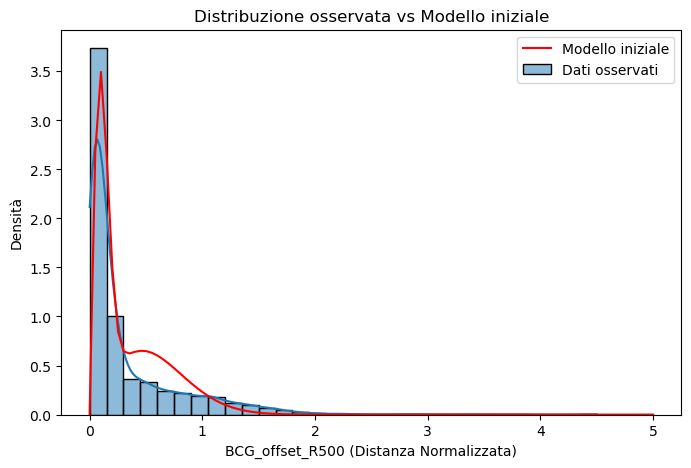

In [419]:
#visualizza modello con parametri iniziali 
x_values = np.linspace(0, 5, 100)
y_values = mixture_model(x_values, 0.5, 0.092, 0.466)

plt.figure(figsize=(8,5))
sns.histplot(df["BCG_offset_R500"], bins=30, kde=True, label="Dati osservati", stat="density")
plt.plot(x_values, y_values, label="Modello iniziale", color="red")
plt.xlabel("BCG_offset_R500 (Distanza Normalizzata)")
plt.ylabel("Densità")
plt.title("Distribuzione osservata vs Modello iniziale")
plt.legend()
plt.show()


Si può osservare come il modello iniziale (linea rossa) sembra seguire l'andamento generale dei dati osservati ma non li approssima perfettamente.
Ci sono delle discrepanze, soprattutto nella parte iniziale, dove la curva rossa ha picchi leggermente diversi rispetto all'istogramma.
Questo probabilmente è dovuto al fatto che nella stima di $\sigma_0$ e $\sigma_1$ è stata ipotizzata una distribuzione gaussiana. Ciò che si ottiene è che il modello viene approssimato a una somma di due gaussiane a due picchi differenti, come in questo grafico.  

Ciò che si può fare è analizzare come il modello si adatta alla distribuzione in funzione dei parametri. Si costruiscono quindi dei grafici in cui si valuta l'andamento del modello in funzione della variazione dei parametri ovvero $\rho$, $\sigma_{0}$ e $\sigma_{1}$. 
Il metodo con la quale è stato deciso di procedere è il seguente: 
- per $\rho$ scegliere tre valori centrati intorno a 0.5;
- per $\sigma_{0}$ e $\sigma_{1}$ scegliere tre valori di cui quello centrale ricavato dalla stima dei parametri iniziali tramite il percentile. 

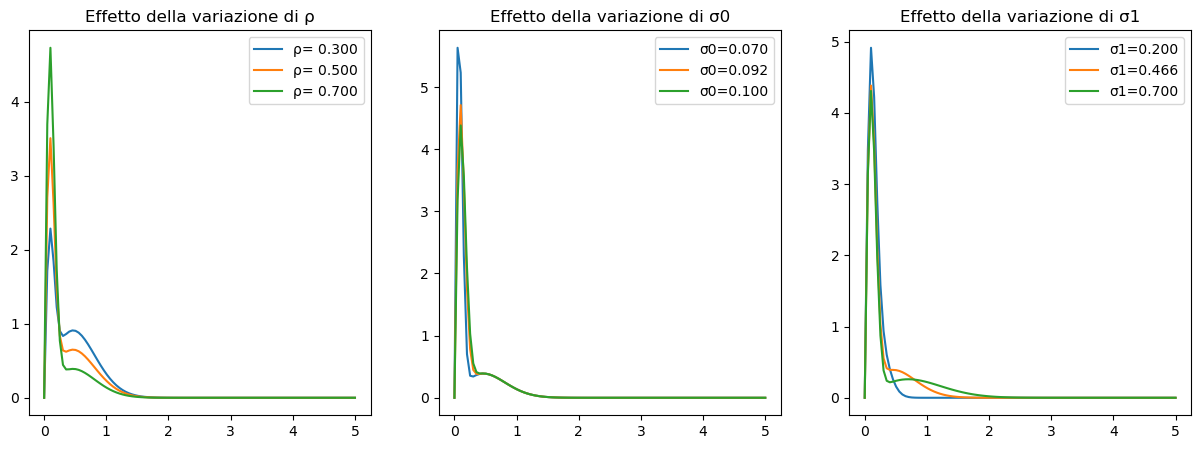

In [420]:

fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Variazione di rho
for rho in [0.300, 0.500, 0.700]:
    axes[0].plot(x_values, mixture_model(x_values, rho, sigma0, sigma1), label=f"ρ={rho: .3f}")
axes[0].set_title("Effetto della variazione di ρ")
axes[0].legend()

# Variazione di sigma0
for sigma0 in [0.07, 0.092, 0.1]:
    axes[1].plot(x_values, mixture_model(x_values, rho, sigma0, sigma1), label=f"σ0={sigma0:.3f}")
axes[1].set_title("Effetto della variazione di σ0")
axes[1].legend()

# Variazione di sigma1
for sigma1 in [0.2, 0.466, 0.7]:
    axes[2].plot(x_values, mixture_model(x_values, rho, sigma0, sigma1), label=f"σ1={sigma1:.3f}")
axes[2].set_title("Effetto della variazione di σ1")
axes[2].legend()

plt.show()


Si osserva come valori maggiori di $\rho$ seguano meglio il fit. Questo è dovuto per lo più al fatto che ho un numero di ammassi centrati molto maggiore rispetto a quelli centrati erroneamente. 
Inoltre il valore di $\sigma_0$ va per lo più a modificare l'altezza del primo picco mentre quello di $\sigma_1$ influisce maggiormente sul secondo picco. 

## III) Analisi Bayesiana

Il passo successivo è quello di determinare la miglior stima dei parametri tramite il metodo MCMC, Markov Chain Monte Carlo il quale corrisponde alla costruzione di una catena di Markov avente come distribuzione di equilibrio la distribuzione desiderata. 
Questo metodo è una tecnica utilizzata frequentemente in statistica bayesiana; MCMC è un insieme di metodi che permettono di campionare dalla distribuzione a posteriori di un modello bayesiano, quando questa è difficile da calcolare direttamente.
Ciò che è fondamentale è capire il legame che c'è tra tre funzioni definite come likelihood, prior e posterior, legame che sta alla base della statistica bayesiana: 

- La **likelihood** (verosimiglianza) è la probabilità di osservare i dati dato un insieme di parametri del modello. In altre parole, è la funzione che esprime quanto è probabile che un certo set di dati si verifichi a partire da un modello con parametri specifici.
Se x rappresenta i dati osservati e $\theta$ i parametri del modello, la likelihood è P(x∣$\theta$), ovvero la probabilità di osservare i dati x dato il modello parametrizzato con $\theta$. In questo caso tale funzione coincide con il modello mixture_model e x è rappresentato dagli offset mentre i parametri del modello corrispondono a $\rho$, $\sigma_0$ e $\sigma_1$. 
- Il **prior** (distribuzione a priori) rappresenta la nostra conoscenza precedente o le nostre ipotesi sui parametri prima di osservare i dati. È una distribuzione che esprime la nostra fiducia sui possibili valori di $\theta$ prima che siano influenzati dai dati osservati.
Se P($\theta$) è la distribuzione a priori dei parametri, essa riflette quanto "crediamo" in ogni possibile valore di $\theta$ prima di avere informazioni dai dati. In questo caso ipotizziamo che $\rho$ sia compreso fra 0 e 1 (siccome indica la frazione degli ammassi centrati), mentre per $\sigma_0$ e $\sigma_1$ ipotizziamo siano maggiori di zero.
- La **posterior** (distribuzione a posteriori) rappresenta la probabilità aggiornata dei parametri $\theta$ dopo aver osservato i dati. Si ottiene combinando il prior con la likelihood, utilizzando il teorema di Bayes; questa si esprime come:
\begin{equation}
       P(\theta|x)=\frac{P(x∣\theta)P(\theta)}{P(x)}
\end{equation}
P(x) indica semplicemente una costante di normalizzazione.

Ciò che è più conveniente è quello di implementare il programma utilizzando la formula della log posterior ma applicandone il logaritmo; Questo è particolarmente utile in ottimizzazione e nelle tecniche di inferenza statistica, in quanto il logaritmo trasforma le probabilità molto piccole in numeri gestibili e semplifica il calcolo dei massimi.



In [421]:
ndim=3
# Modello di miscentering
def mixture_model(x, rho, sigma0, sigma1):
    return ((x/(sigma0**2))*rho*np.exp(-0.5*(x/sigma0)**2)) + ((x/(sigma1**2))*(1-rho)*np.exp(-0.5*(x/sigma1)**2))


def log_likelihood(params, x):
    rho, sigma0, sigma1 = params
    if not (0 < rho < 1 and sigma0 > 0 and sigma1 > 0):
        return -np.inf  # Impedisce valori non fisici
    model_values = mixture_model(x, rho, sigma0, sigma1)
    # Aggiungi un controllo per evitare valori troppo piccoli
    return np.sum(np.log(model_values))


# log_Prior
def log_prior(params):
    rho, sigma0, sigma1 = params
    if 0 < rho < 1 and sigma0 > 0 and sigma1 > 0:
        return 0  
    return -np.inf



# log_Posterior
def log_posterior(params, x):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x) #applicando i logaritmi ottengo la somma della log_Prior e del log_likelihood 




In seguito è necessario impostare la catena di Markov. L'idea è che i campioni "camminino" attraverso lo spazio dei parametri, visitando più frequentemente le regioni ad alta probabilità della distribuzione a posteriori. Più campioni vengono generati, più accurata sarà l'approssimazione della distribuzione a posteriori.
Perciò si definisce la posizione iniziale dei "camminatori": si parte dai valori dei parametri impostati in base all'andamento osservato nella sezione precedente applicandoli una piccola perturbazione. Successivamente si calcolano i valori dei parametri che massimizzano la funzione log_posterior definendoli come il punto di partenza dei camminatori. Infine li si applica un'ulteriore piccola perturbazione. 

Successivamente si genera un campionatore MCMC che utilizza un "ensemble" di walker,ovvero catene Markov multiple che esplorano lo spazio dei parametri contemporaneamente. In questo caso il numero di camminatori è 32 mentre il numero di passi è 3000. 
L'importante è che il numero di camminatori superi la soglia minima, ovvero 2ndim+1 (in questo caso 7).

In [422]:
from emcee.autocorr import integrated_time
from scipy.optimize import minimize
x = df['BCG_offset_R500'].values

np.random.seed(42)
inverse = lambda *args: -log_posterior(*args)
initial = np.array([0.6, 0.05, 0.6])*(1+ 0.1 * np.random.randn(3))
paramin = minimize(inverse, initial, args=(x,))
rho, sigma0, sigma1 = paramin.x
print(paramin.x)


pos = paramin.x *(1+ 1e-4 * np.random.randn(32, 3))
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x,))
sampler.run_mcmc(pos, 3000, progress=True);

autocorr_time = integrated_time(sampler.get_chain(flat=True), c=10)
print("Tempo di autocorrelazione:", autocorr_time)

[0.62825884 0.06699864 0.62301054]


100%|██████████████████████████████████████| 3000/3000 [00:10<00:00, 273.64it/s]

Tempo di autocorrelazione: [0.92343798]


È possibile poi graficare il numero di "passi" svolti dai "camminatori" in funzione dei valori dei parametri. Ciò che si osserva è che i camminatori si stabilizzano attorno al valore vero dei parametri; I walkers infatti dopo aver trovato il valore corretto del parametro oscillano attorno ad esso.  
Un modo per poter migliorare la convergenza potrebbe esser quello di aumentare il numero di passi in modo da migliorare la precisione della stima; ciò infatti permette alla catena di esplorare meglio la distribuzione a posteriori e di ridurre l'incertezza sulle stime.

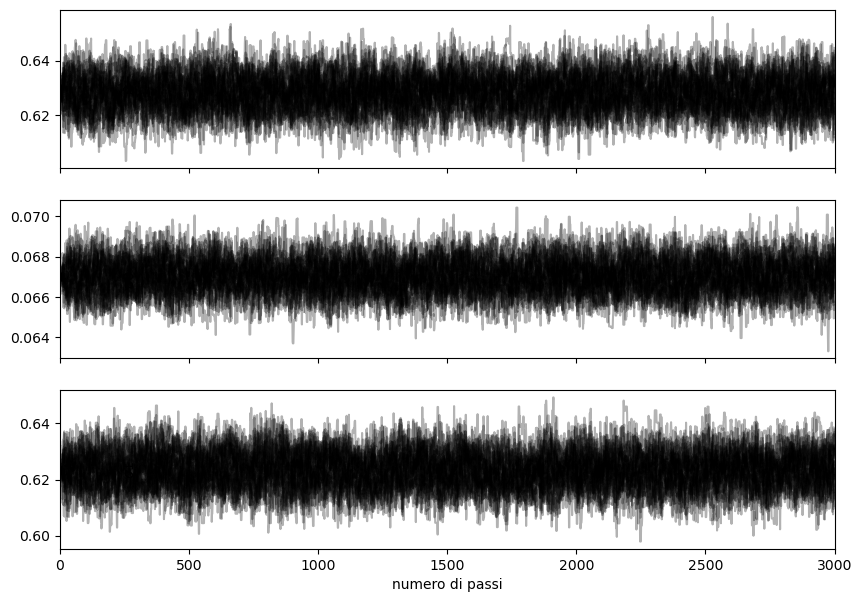

In [423]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = [r"$\rho$",r"$\sigma0$", r"$\sigma1$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(0.1, 0.5)

axes[-1].set_xlabel("numero di passi");

Per poter verificare la correlazione fra i parametri $\rho$, $\sigma_0$ e $\sigma_1$ si costruisce un triangle plot. Nel caso in cui la correlazione fosse alta significherebbe che questi parametri non possono essere stimati in modo indipendente, e il modello dovrebbe essere ridimensionato. 
Per fare questo è necessario trasformare i campioni MCMC in una matrice bidimensionale dove ogni riga rappresenta un campione e ogni colonna un parametro. Quindi, se come in questo caso si hanno 32 walkers, 3000 passi e 3 parametri, i dati avranno dimensione: (32, 3000, 3). Appiattendo i primi due indici si ottiene una matrice del tipo (32x3000, 3). In questo caso si eliminano i primi 100 passi siccome i primi campioni della catena MCMC non sono considerati indipendenti e non rappresentano bene la distribuzione di interesse. Questo accade perché all'inizio della simulazione la catena potrebbe essere ancora lontana dalla sua distribuzione stazionaria, cioè il comportamento della catena potrebbe dipendere fortemente dai valori di partenza.

In [424]:
flat_samples = sampler.get_chain(discard=100, flat=True)
print(flat_samples.shape)


(92800, 3)


Il grafico sottostante è il triangle plot:
- I grafici sulla diagonale rappresentano le distribuzioni a posteriori univariate di ogni parametro; le curve sono le distribuzioni di probabilità di $\rho$, $\sigma_0$ e $\sigma_1$, ottenute dagli MCMC samples. Più le curve sono strette, più il parametro è ben determinato. 

- Le ellissi bidimensionali mostrano la distribuzione congiunta di coppie di parametri. Ogni punto rappresenta un campione MCMC. L'ellisse più scura si riferisce all'intervallo di confidenza al 68% (equivalente a ±1σ per una Gaussiana) mentre l'ellisse più chiara inidica l'intervallo di confidenza al 95% (equivalente a ±2σ per una Gaussiana). Con questo si intende che nell'ellisse più grande si ha una probabilità maggiore che la vera correlazione cada al suo interno, ma con un'incertezza maggiore riguardo al suo valore vero. 

In questo caso si osserva che: 

- $\rho$ e $\sigma_0$ insieme a $\sigma_0$ e $\sigma_1$ sono moderatamente correlati: le ellissi sono inclinate, suggerendo che se uno aumenta, anche l'altro tende ad aumentare;
- $\rho$ e $\sigma_1$ mostrano una correlazione più debole siccome l'ellisse è più circolare.



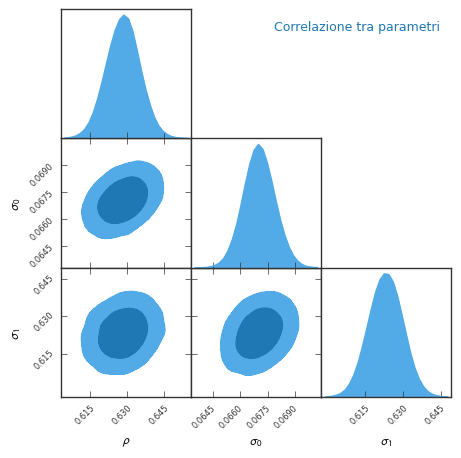

In [425]:

import pygtc
GTC = pygtc.plotGTC(
    chains=flat_samples,
    paramNames=[r'$\rho$', r'$\sigma_0$', r'$\sigma_1$'],
    chainLabels=['Correlazione tra parametri'],
    figureSize='MNRAS_page'
)



Per poter osservare graficamente quali sono i valori stimati dei parametri dal modello è necessario costruire un istogramma per ciascun parametro e osservare la distribuzione che seguono. Si può notare in questo caso che la distribuzione segue un andamento gaussiano centrato attorno ai valori medi. Il fatto che i parametri stimati seguono una gaussiana è un buon segno che la catena MCMC si è stabilizzata e ha campionato correttamente dalla distribuzione a posteriori.

0.6283707018819091
0.006531451327285105


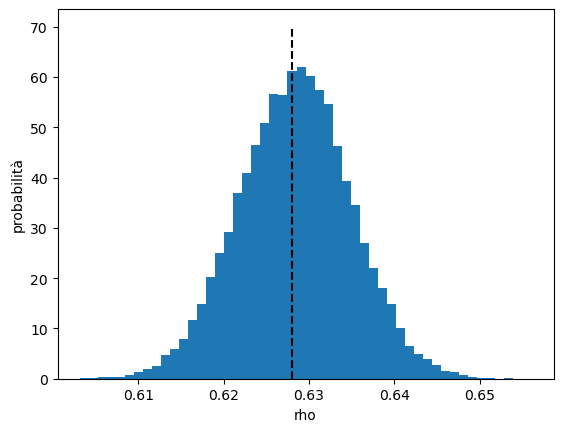

0.06703367538570831
0.000825277238264422


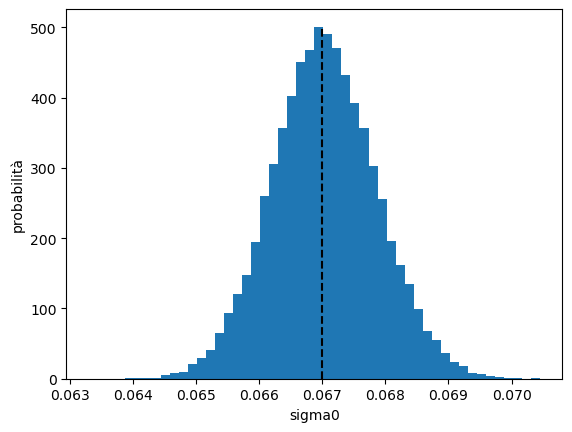

0.6233000083894764
0.006460079308794649


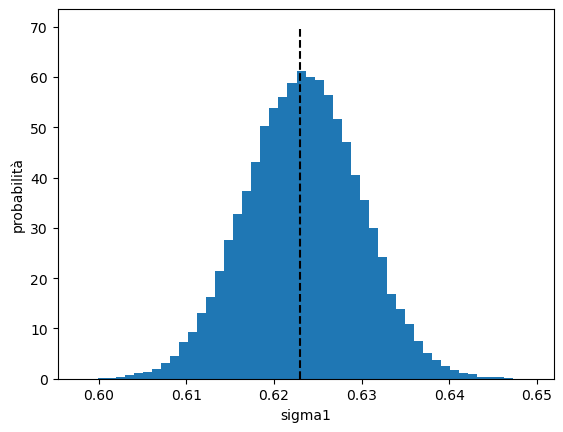

In [393]:
rho= flat_samples[:, 0]
sigma0= flat_samples[:, 1]
sigma1= flat_samples[:, 2]

plt.hist(rho, bins=50, density=True)
rhom= np.mean(rho)
print( rhom)
print(np.std(rho))
plt.xlabel("rho")
plt.ylabel("probabilità")
plt.vlines(0.628,0,70, colors="black", linestyles="dashed")
plt.show()

plt.hist(sigma0, bins=50, density=True)
sigma0m= np.mean(sigma0)
print(sigma0m)
print(np.std(sigma0))
plt.xlabel("sigma0")
plt.ylabel("probabilità")
plt.vlines(0.067,0,500, colors="black", linestyles="dashed")
plt.show() 

plt.hist(sigma1, bins=50, density=True)
sigma1m= np.mean(sigma1)
print(sigma1m)
print(np.std(sigma1))
plt.xlabel("sigma1")
plt.ylabel("probabilità")
plt.vlines(0.623,0,70, colors="black", linestyles="dashed")
plt.show() 

### Confronto fra le previsioni del modello e i dati osservati 

Per verificare l'accuratezza del modello, è necessario confrontare il fit ottenuto con i parametri stimati tramite MCMC, con la distribuzione delle distanze normalizzate iniziali. Questo confronto permette di valutare se il modello è in grado di approssimare accuratamente la distribuzione dei dati.

Nel seguente blocco di codice, vengono stampati i valori ottimali dei parametri, ovvero quelli che massimizzano la log-verosimiglianza, utilizzando un ciclo for. I best-fit sono definiti come i parametri che rendono i dati osservati più probabili sotto il modello, poiché la log-verosimiglianza misura il grado di adattamento del modello ai dati.

Oltre ai best-fit, il ciclo calcola anche il valore medio dei parametri, attorno al quale si distribuiscono i campioni MCMC. Se la distribuzione è simmetrica e gaussiana, i valori medi e i best-fit tendono a essere simili, mentre in presenza di distribuzioni asimmetriche potrebbero differire.

In [394]:
import getdist
from getdist import plots, MCSamples

means=np.zeros(ndim) #inizializzo l'array per mermorizzare 
best_fits=np.zeros(ndim)

labels=["rho","sigma0","sigma1"]
names=["rho","sigma0","sigma1"]
samples = MCSamples(samples=flat_samples, names = names, labels = labels)

log_like= sampler.get_log_prob(discard=200, thin=2, flat=True) #  restituisce i valori di log-verosimiglianza per ogni passo della catena

for i in range(len(names)):
    print(samples.getInlineLatex(names[i], limit=1))
    stats = samples.getMargeStats()
    means[i] = stats.parWithName(names[i]).mean  # Estrae la media del parametro
    best_fits[i] = flat_samples[np.argmax(log_like), i]  # Correzione qui
    print(labels[i], 'best fit =', best_fits[i])


Removed no burn in
rho = 0.6284\pm 0.0065
rho best fit = 0.6205546940442249
sigma0 = 0.06703\pm 0.00083
sigma0 best fit = 0.06682767638336556
sigma1 = 0.6233\pm 0.0065
sigma1 best fit = 0.6260119873996967


In questa casella di codice sono stati eseguiti due grafici: 

- il primo genera una comparazione tra la distribuzione dei dati osservati rappresentati dall'istogramma e tre fit del modello: uno ricavato dal valor medio dei parametri, uno dai valori di miglior fit ricavati nella sezione precedente e uno casuale da dei parametri campionati tramite MCMC. Ciò che si osserva è che il modello segue alquanto bene i dati, anche per valori di offset relativamente piccoli pur avendo una quantità di dati minore. D'altra parte però i picchi sono sfasati rispetto alla distribuzione degli offset, specialmente il primo picco. 

- Il secondo grafico rappresenta i residui, ovvero la deviazione tra i modelli generati e il modello medio.
Dopo aver generato molti modelli casuali (con parametri campionati dalla distribuzione delle catene di MCMC) per ciascun di essi, è stato calcolato il rapporto tra il modello stesso e il modello ricavato dai best_fits:

1) Se il valore è 1, significa che il modello casuale coincide perfettamente con il modello medio.
2) Se il valore è maggiore di 1, il modello casuale è maggiore del modello medio.
3) Se il valore è minore di 1, il modello casuale è minore del modello medio.

In altre parole, il secondo grafico mostra la dispersione dei modelli. Ciò che si osserva è che la differenza fra i due modelli diventa particolarmente evidente nel momento in cui i conteggi di offset diminuiscono, quindi quando il valore delle distanze diventa relativamente grande. Infatti avendo pochi dati in una certa regione l'incertezza del modello aumenta.
Nei modelli generati casualmente da MCMC, i parametri sono estratti da una distribuzione; se ci sono pochi dati per grandi valori di x, i parametri associati a questa regione sono meno vincolati e possono assumere valori molto diversi tra loro. Questo porta a una maggiore dispersione delle curve nei grandi valori di x, aumentando la differenza rispetto al modello medio.
Quindi per x grandi, dove ci sono pochi dati, il modello medio è meno rappresentativo e può essere meno preciso. Si osserva inoltre in questo grafico un aumento di discrepanza tra i modelli casuali e quello medio relativo al secondo picco della distribuzione dei dati. Infatti osservando il primo grafico si può notare come il modello non aprrossimi bene la curva in quell'intervallo di offset. 

/tmp/ipykernel_29150/1645940308.py:27: RuntimeWarning: invalid value encountered in divide
  ax[1].plot(x_data, model/finalm, "C1", alpha=0.1)


Text(0, 0.5, 'Residual')

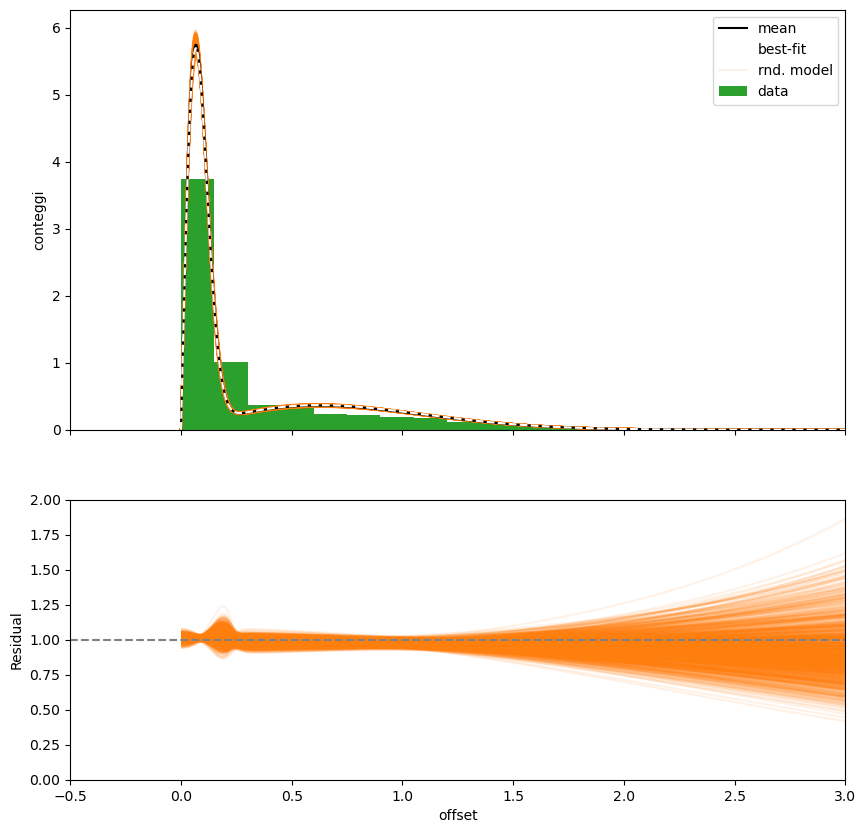

In [395]:
# Define array of redshift values
x_data = np.linspace(0, 5, 1000)
x = df['BCG_offset_R500'].values
fig, ax = plt.subplots(2, figsize=(10, 10), sharex=True,gridspec_kw = {'height_ratios':[3,2]})

# mean model
rhoM, sigma0M, sigma1M = means
finalm=mixture_model(x_data, rhoM, sigma0M, sigma1M)
ax[0].plot(x_data, finalm, c="k",zorder=10,label='mean')
  
mean_relation_at_data=mixture_model(x, rhoM, sigma0M, sigma1M)

# Best-fit model
rho, sigma_0, sigma_1 = best_fits
finalm=mixture_model(x_data, rho, sigma_0, sigma_1)
ax[0].plot(x_data, finalm, c="w",ls='--',zorder=11,label='best-fit')

N=1000 # number of sampled points from the chain
inds = np.random.randint(len(flat_samples), size=N) # definerandom indicies to be sampled
for ind in inds:
    rho, sigma_0, sigma_1 = flat_samples[ind]
    model = mixture_model(x_data, rho, sigma_0, sigma_1)
    if ind==inds[0]:
        ax[0].plot(x_data, model, "C1", alpha=0.1, label='rnd. model')
    else:
        ax[0].plot(x_data, model, "C1", alpha=0.1)
    ax[1].plot(x_data, model/finalm, "C1", alpha=0.1)


ax[0].hist(x, bins=30, color="C2", zorder=0,label='data', density=True)


ax[0].set_ylabel('conteggi')
ax[0].legend()


ax[1].set_ylim(0,2)
ax[1].set_xlim(-0.5,3)
ax[1].set_xlabel('offset')
ax[1].axhline(1.,ls='--',c='gray')
ax[1].set_ylabel('Residual')


Per valutare quanto bene il modello si adatta ai dati osservati utilizziamo la statistica del $\chi^{2}$. La sua formula generale appare come: 
\begin{equation}
\chi^2=\sum_{i=0}^{n}\frac{(O_i-E_i)^2}{E_i}
\end{equation}
Dove 
- $O_i$  corrisponde al valore osservato;
- $E_i$ corrisponde al valore attteso dal modello;
  
Se $\chi^2$ è grande, significa che c'è una forte discrepanza tra i dati osservati e quelli attesi e quindi il modello non si adatta bene ai dati.

Dopo aver calcolato il chi-quadro, lo si confronta con un valore critico preso dalla distribuzione che dipende dai gradi di libertà (dof):
gradi di libertaˋ=numero di bins − numero di parametri.


- Se $\chi^2$ è minore del valore critico il modello è un buon fit;
- Se $\chi^2$ è maggiore del valore critico il Il modello non è un buon fit;

Un'altra misura utile è il chi-quadro ridotto:
\begin{equation}
\chi^2_\nu= dof \cdot \chi^2
\end{equation}

- Se $\chi^2_\nu$≈1, il fit è buono.
- Se $\chi^2_\nu$>>1, il modello non descrive bene i dati;
- Se $\chi^2_\nu$<<1, il modello potrebbe essere troppo flessibile e sovra-adattare i dati.

In [396]:
from scipy.stats import chi2

x_data = df['BCG_offset_R500'].values
num_bins = 100
hist_obs, bin_edges = np.histogram(x_data, bins=num_bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Centri dei bin

# Calcolo dei valori attesi dal modello nei centri dei bin
expected = mixture_model(bin_centers, rho_best, sigma0_best, sigma1_best)

#elimino i valori troppo piccoli
expected_filtered= np.clip(expected , 1/len(x_data) , None)

# Calcolo del chi-quadro classico solo sui bin validi
chi_sq = np.sum((hist_obs - expected_filtered)**2 / expected_filtered)

# Gradi di libertà aggiornati
n_dof = len(hist_obs) - ndim  # numero di bin rimasti - numero di parametri del modello

# Chi-quadro ridotto
reduced_chi_sq = chi_sq / n_dof

# Valore critico del chi-quadro a livello di confidenza 95%
alpha = 0.05
chi_critical = chi2.ppf(1 - alpha, n_dof)

# Stampa dei risultati
print("Numero di gradi di libertà:", n_dof)
print(f'Chi-quadro classico = {chi_sq:.2f}')
print(f'Chi-quadro ridotto = {reduced_chi_sq:.2f}')
print(f'Valore critico del Chi-quadro (alpha=0.05) = {chi_critical:.2f}')

# Valutazione della bontà del fit
if chi_sq < chi_critical:
    print("✅ Il modello è un buon fit ai dati!")
else:
    print("❌ Il modello potrebbe non adattarsi bene ai dati.")


Numero di gradi di libertà: 97
Chi-quadro classico = 7.26
Chi-quadro ridotto = 0.07
Valore critico del Chi-quadro (alpha=0.05) = 120.99
✅ Il modello è un buon fit ai dati!


Questo risultato suggerisce che il modello si adatta molto bene ai dati. Vediamo perché:
- Chi-quadro classico = 7.26. Un valore molto basso rispetto ai gradi di libertà indica che la differenza tra dati osservati e modello è piccola.

- Chi-quadro ridotto = 0.07. Il valore ideale sarebbe circa 1, ma un valore così basso può indicare che il modello è troppo buono, suggerendo overfitting (forse i dati sono stati sovra-adattati). Questo siginificherebbe che il modello "memorizza" troppo i dati di "addestramento" invece di capire le regole generali, e quindi non si comporta bene su dati nuovi.

- Valore critico del Chi-quadro (120.99) ≫ Chi-quadro classico (7.26). Il test conferma che il modello non è da rifiutare, anzi, il fit è molto migliore di quanto richiesto per accettarlo.

In conclusione il modello si adatta bene ai dati, ma il chi-quadro ridotto troppo basso potrebbe suggerire overfitting o incertezze eccessive. 

## IV) Sviluppo del secondo modello 

DOpo aver analizzato il primo modello, il passo successivo è quello di verificare l'accuratezza di un secondo modello definito come segue: 
\begin{equation}
    P(x|\rho,\sigma_{0},\sigma_{1}) = \rho \frac{1}{\sigma_{0}} \exp\left(-\left(\frac{x}{\sigma_0}\right)\right) + (1-\rho) \frac{x}{\sigma_{1}^2} \exp\left(-\left(\frac{x}{\sigma_{1}}\right)\right)
\end{equation}
$\rho$ rappresenza sempre la frazione degli ammassi ben centrati. 

In [397]:
def mixture_model2(x, rho ,sigma0, sigma1): 
 return rho*(1/sigma0)*np.exp(-x/sigma0) + (1-rho)*(x/sigma1**2)*np.exp(-x/sigma1)

Per la stima dei valori iniziali dei parametri è stato deciso di procedere con gli stessi valori nel caso del primo modello, ipotizzando quindi che $\sigma_0$ e $\sigma_1$ siano le deviazioni standard di due distribuzioni normali, una rappresentata dai dati con valore minore o uguale al 75° percentile, l'altra relativa ai dati con valore maggiore. 

In [398]:
import numpy as np

def estimate_params_with_percentiles(data, percentile=75):
 
    # Calcola il valore del percentile
    percentile_value = np.percentile(data, percentile)
    
    # Separazione dei dati in due gruppi
    lower_half = data[data <= percentile_value]
    upper_half = data[data > percentile_value]
    
    # Stima delle deviazioni standard nei due gruppi
    sigma0 = np.std(lower_half)
    sigma1 = np.std(upper_half)
    
    # Stima di rho come la frazione di dati nel primo gruppo
    rho = len(lower_half) / len(data)
    
    return sigma0, sigma1, rho

data = df["BCG_offset_R500"]
sigma0, sigma1, rho = estimate_params_with_percentiles(data, percentile=75)

print(f"Stima di sigma0: {sigma0:.3f}")
print(f"Stima di sigma1: {sigma1:.3f}")
print(f"Stima di rho: {rho:.3f}")


Stima di sigma0: 0.092
Stima di sigma1: 0.466
Stima di rho: 0.750


Dall'osservazione del grafico, il fit del modello iniziale rispetto ai dati osservati non è perfetto, ma nemmeno completamente fuori scala:
- per valori più grandi della distanza normalizzata (x>0.5), la curva del modello sembra seguire abbastanza bene l'andamento della distribuzione osservata;
- d'altra parte il modello sembra sovrastimare la densità per valori molto bassi vicino allo zero: l'istogramma mostra una concentrazione maggiore in un intervallo ristretto, mentre la curva del modello ha un picco più accentuato e più stretto.
Essendo un modello preliminare è necessario raffinare i parametri tramite MCMC.

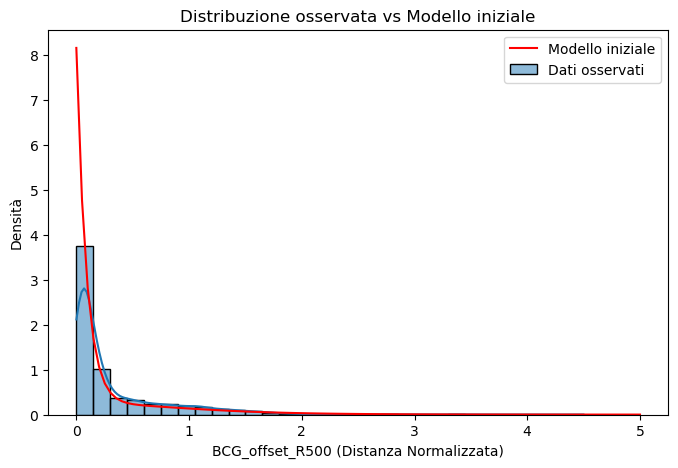

In [399]:

#visualizza modello con parametri iniziali 
x_values = np.linspace(0, 5, 100)
y_values = mixture_model2(x_values, 0.75, 0.092, 0.466)

plt.figure(figsize=(8,5))
sns.histplot(df["BCG_offset_R500"], bins=30, kde=True, label="Dati osservati", stat="density")
plt.plot(x_values, y_values, label="Modello iniziale", color="red")
plt.xlabel("BCG_offset_R500 (Distanza Normalizzata)")
plt.ylabel("Densità")
plt.title("Distribuzione osservata vs Modello iniziale")
plt.legend()
plt.show()


Osservando come il modello varia in funzione dei parametri si può notare come l'oscillazione del parametro $\sigma_1$ ha un impatto significativamente minore sul modello rispetto agli altri, i quali invece influenzano in maniera notevole l'altezza del picco iniziale.

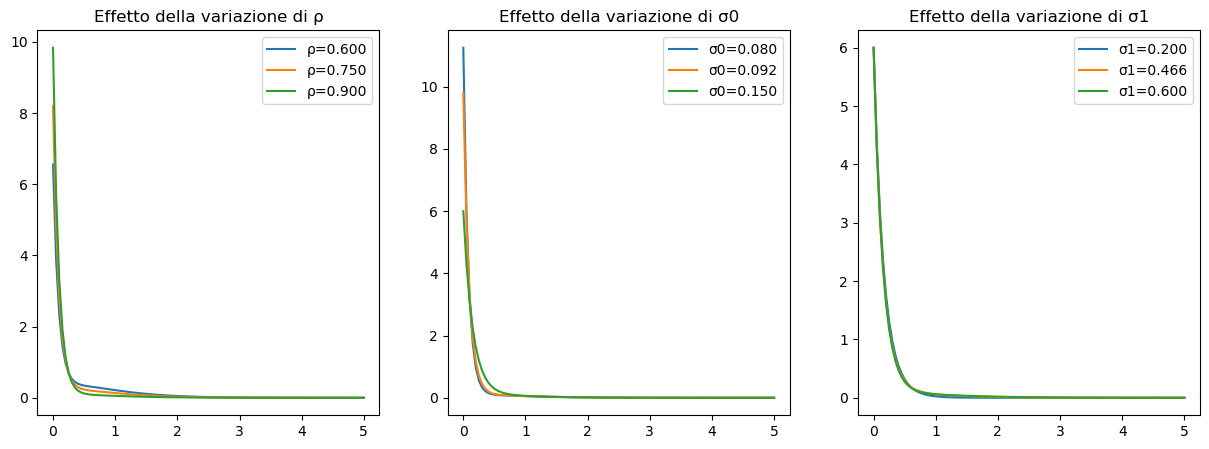

In [400]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Variazione di rho
for rho in [0.600, 0.750, 0.900]:
    axes[0].plot(x_values, mixture_model2(x_values, rho, sigma0, sigma1), label=f"ρ={rho:.3f}")
axes[0].set_title("Effetto della variazione di ρ")
axes[0].legend()

# Variazione di sigma0
for sigma0 in [0.080, 0.092, 0.150]:
    axes[1].plot(x_values, mixture_model2(x_values, rho, sigma0, sigma1), label=f"σ0={sigma0:.3f}")
axes[1].set_title("Effetto della variazione di σ0")
axes[1].legend()

# Variazione di sigma1
for sigma1 in [0.200, 0.466, 0.600]:
    axes[2].plot(x_values, mixture_model2(x_values, rho, sigma0, sigma1), label=f"σ1={sigma1:.3f}")
axes[2].set_title("Effetto della variazione di σ1")
axes[2].legend()

plt.show()


Come già svolto in precedenza, per avere una miglior stima dei parametri utilizziamo MCMC quindi: 
- definiamo le funzioni log_likelihood, log_prior e log_posterior;
- inizializziamo la posizione di partenza dei walkers applicando una piccola perturbazione;
- valutiamo l'andamento dei camminatori attorno al punto di equilibrio ovvero quindi il valore vero dei parametri. 

In [401]:
ndim=3
# Modello di miscentering
def mixture_model2(x, rho ,sigma0, sigma1): 
 return rho*(1/sigma0)*np.exp(-x/sigma0) + (1-rho)*(x/sigma1**2)*np.exp(-x/sigma1)


def log_likelihood(params, x):
    rho, sigma0, sigma1 = params
    if not (0 < rho < 1 and sigma0 > 0 and sigma1 > 0):
        return -np.inf  # Impedisce valori nonmodello fisici
    model_values = mixture_model2(x, rho, sigma0, sigma1)
    return np.sum(np.log(model_values))


# log_Prior
def log_prior(params):
    rho, sigma0, sigma1 = params
    if 0 < rho < 1 and sigma0 > 0 and sigma1 > 0:
        return 0  
    return -np.inf



# log_Posterior
def log_posterior(params, x):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x) #applicando i logaritmi ottengo la somma della log_Prior e del log_likelihood 




In [403]:
from emcee.autocorr import integrated_time
x = df['BCG_offset_R500'].values

np.random.seed(42)
logneg = lambda *args: -log_posterior(*args)
initial = np.array([0.7, 0.1, 0.4])*(1+ 0.1 * np.random.randn(3))
paramsin = minimize(logneg, initial, args=(x,))
rho, sigma0, sigma1 = paramsin.x
print(paramsin.x)

pos = paramsin.x *(1+ 1e-4 * np.random.randn(32, 3))
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x,))
sampler.run_mcmc(pos, 3000, progress=True);

autocorr_time = integrated_time(sampler.get_chain(flat=True), c=10)
print("Tempo di autocorrelazione:", autocorr_time)

[0.68042443 0.09869459 0.39151588]


100%|██████████████████████████████████████| 3000/3000 [00:09<00:00, 301.64it/s]

Tempo di autocorrelazione: [0.95879873]


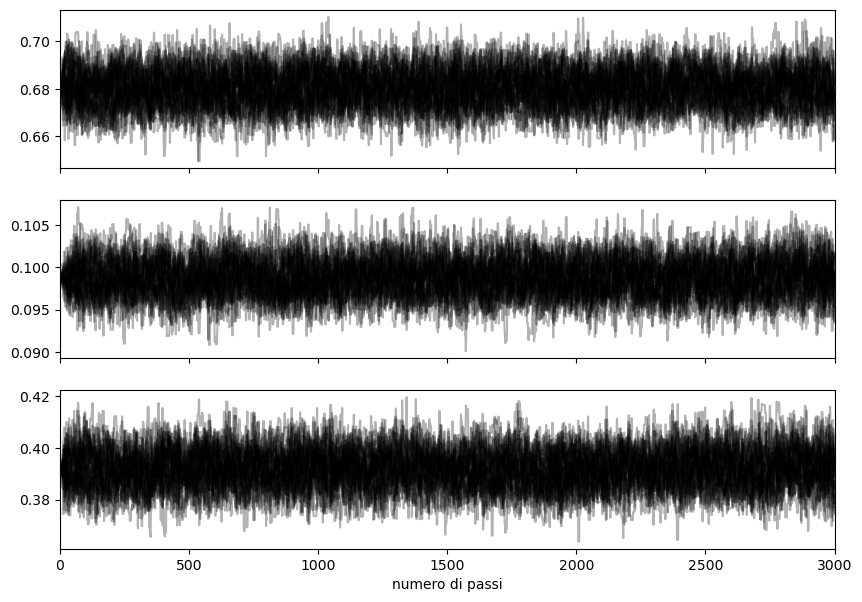

In [404]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = [r"$\rho$",r"$\sigma0$", r"$\sigma1$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(0.1, 0.5)

axes[-1].set_xlabel("numero di passi");

(92800, 3)


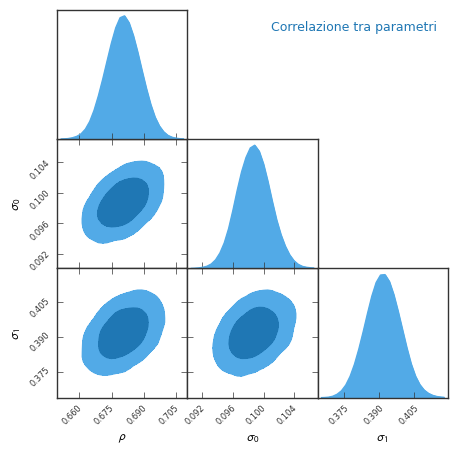

In [405]:
flat_samples = sampler.get_chain(discard=100, flat=True)
print(flat_samples.shape)

import pygtc
GTC = pygtc.plotGTC(
    chains=flat_samples,
    paramNames=[r'$\rho$', r'$\sigma_0$', r'$\sigma_1$'],
    chainLabels=['Correlazione tra parametri'],
    figureSize='MNRAS_page'
)


Rispetto al primo modello si osserva che i parametri $\rho$, $\sigma_0$ e $\sigma_1$ sono maggiormente correlati, le ellissi infatti sono più sciacciate e più inclinate rispetto agli assi. La correlazione è maggiore per $\rho$ con $\sigma_0$ e $\sigma_1$, mentre minore tra $\sigma_0$ e $\sigma_1$.

Osservando invece il grafico sottostante si può notare come i conteggi di tutti e tre i parametri hanno un andamento gaussiano centrato attorno al valor medio del parametro stesso, come nel caso del primo modello. 

0.6803730905864003
0.007593881162502031


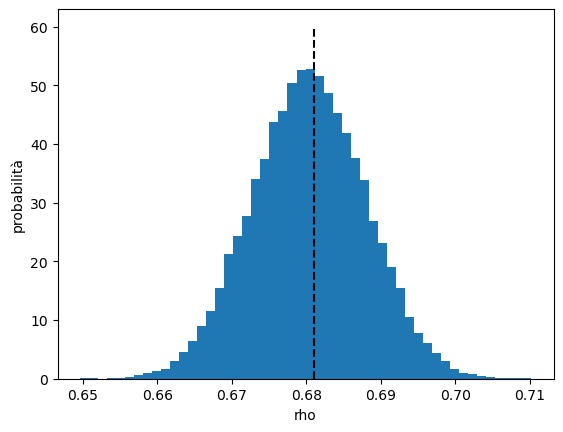

0.09872842733530372
0.002108719809126786


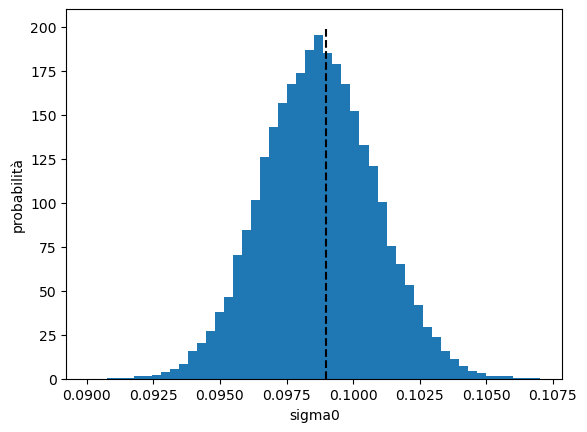

0.3918109149414149
0.007224124621993946


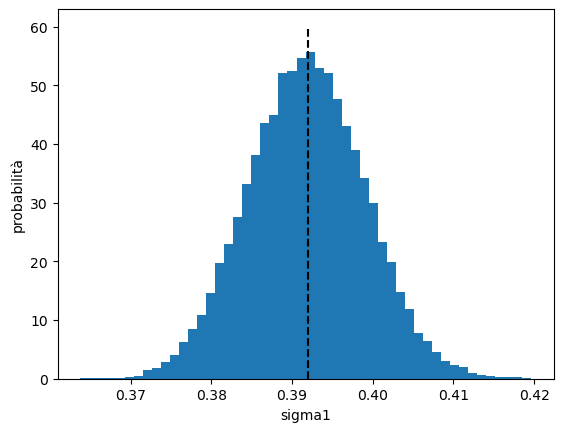

In [406]:
rho= flat_samples[:, 0]
sigma0= flat_samples[:, 1]
sigma1= flat_samples[:, 2]

plt.hist(rho, bins=50, density=True)
rhom= np.mean(rho)
print( rhom)
print(np.std(rho))
plt.xlabel("rho")
plt.ylabel("probabilità")
plt.vlines(0.681,0,60, colors="black", linestyles="dashed")
plt.show()

plt.hist(sigma0, bins=50, density=True)
sigma0m= np.mean(sigma0)
print(sigma0m)
print(np.std(sigma0))
plt.xlabel("sigma0")
plt.ylabel("probabilità")
plt.vlines(0.099,0,200, colors="black", linestyles="dashed")
plt.show() 

plt.hist(sigma1, bins=50, density=True)
sigma1m= np.mean(sigma1)
print(sigma1m)
print(np.std(sigma1))
plt.xlabel("sigma1")
plt.ylabel("probabilità")
plt.vlines(0.392,0,60, colors="black", linestyles="dashed")

Per poter paragonare la distribuzione dei dati con il modello calcoliamo i valori medi e i "best fits" ricavati da MCMC: 

In [407]:
means=np.zeros(ndim)
best_fits=np.zeros(ndim)
import getdist
from getdist import plots, MCSamples

labels=["rho","sigma0","sigma1"]
names=["ro","sigma0","sigma1"]
samples = MCSamples(samples=flat_samples, names = names, labels = labels)

log_like= sampler.get_log_prob(discard=200, thin=2, flat=True) # the the log-like values for each step of the chain

for i in range(len(names)):
    print(samples.getInlineLatex(names[i],limit=1))
    stats  =samples.getMargeStats()
    means[i] = stats.parWithName(names[i]).mean
    best_fits[i]=flat_samples[np.argwhere(log_like==np.amax(log_like)),i]
    print(labels[i],'best fit =',best_fits[i])

Removed no burn in
rho = 0.6804\pm 0.0076
rho best fit = 0.6773328444548169
sigma0 = 0.0987\pm 0.0021
sigma0 best fit = 0.0984648740630623
sigma1 = 0.3918\pm 0.0072
sigma1 best fit = 0.3892067368747657


/tmp/ipykernel_29150/1744118937.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  best_fits[i]=flat_samples[np.argwhere(log_like==np.amax(log_like)),i]


Text(0, 0.5, 'Residual')

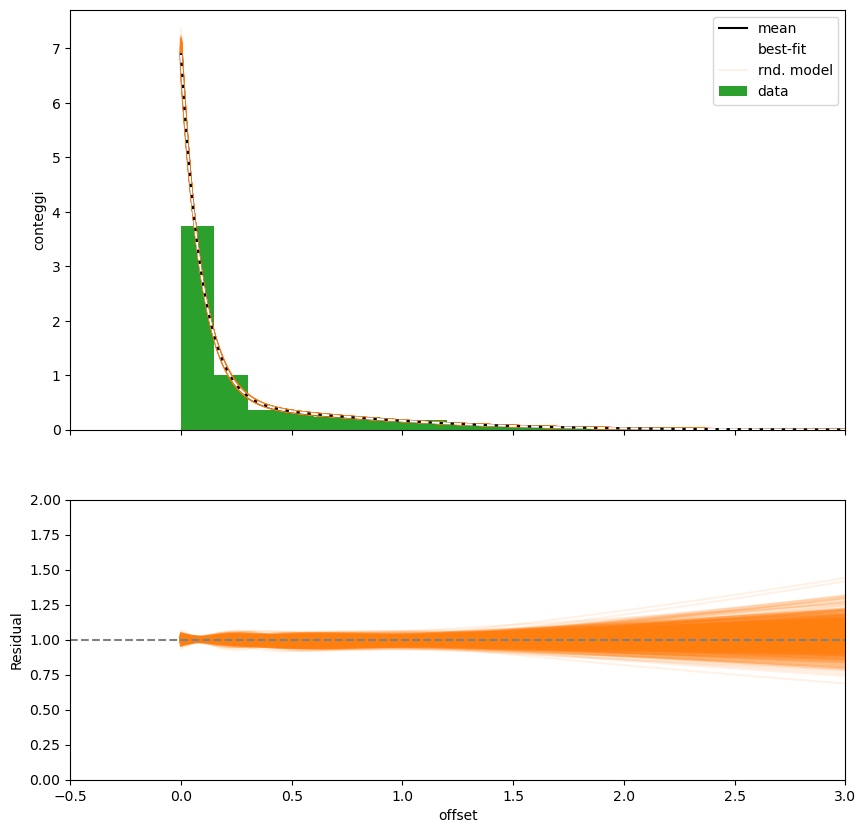

In [408]:
# Define array of redshift values
x_data = np.linspace(0, 5, 1000)
x = df['BCG_offset_R500'].values
fig, ax = plt.subplots(2, figsize=(10, 10), sharex=True,gridspec_kw = {'height_ratios':[3,2]})

# mean model
rhoM, sigma0M, sigma1M = means
finalm=mixture_model2(x_data, rhoM, sigma0M, sigma1M)
ax[0].plot(x_data, finalm, c="k",zorder=10,label='mean')
  
mean_relation_at_data=mixture_model2(x, rhoM, sigma0M, sigma1M)

# Best-fit model
rho, sigma_0, sigma_1 = best_fits
finalm=mixture_model2(x_data, rho, sigma_0, sigma_1)
ax[0].plot(x_data, finalm, c="w",ls='--',zorder=11,label='best-fit')

N=1000 # number of sampled points from the chain
inds = np.random.randint(len(flat_samples), size=N) # definerandom indicies to be sampled
for ind in inds:
    rho, sigma_0, sigma_1 = flat_samples[ind]
    model = mixture_model2(x_data, rho, sigma_0, sigma_1)
    if ind==inds[0]:
        ax[0].plot(x_data, model, "C1", alpha=0.1, label='rnd. model')
    else:
        ax[0].plot(x_data, model, "C1", alpha=0.1)
    ax[1].plot(x_data, model/finalm, "C1", alpha=0.1)


ax[0].hist(x, bins=30, color="C2", zorder=0,label='data', density=True)


ax[0].set_ylabel('conteggi')
ax[0].legend()


ax[1].set_ylim(0,2)
ax[1].set_xlim(-0.5,3)
ax[1].set_xlabel('offset')
ax[1].axhline(1.,ls='--',c='gray')
ax[1].set_ylabel('Residual')


Osservando il primo grafico i tre fit del modello ovvero: quello ricavato dal valor medio dei parametri, quello dai valori di miglior fit e quello da dei parametri campionati tramite MCMC, seguono abbastanza bene i dati, in particolare per valor di offset grandi, ma non per valori di offset piccoli. Il picco iniziale infatti non viene ben approssimato dalla curva come si può vedere dal grafico. 
Nel secondo grafico invece si può notare che i residui oscillano intorno ad uno anche per valori di offset superiori ad 1. Questo risultato è di gran lunga migliore rispetto al risultato ottenuto dal primo modello. Di conseguenza il modello casuale si avvicina maggiormente al modello medio.


Per verificare la bontà del fit utilizziamo la statistica dei $\chi^2$:

In [410]:
from scipy.stats import chi2

x_data = df['BCG_offset_R500'].values

num_bins = 100  # Numero di bin 
hist_obs, bin_edges = np.histogram(x_data, bins=num_bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Centri dei bin

# Calcolo dei valori attesi dal modello nei centri dei bin
expected = mixture_model2(bin_centers, rho_best, sigma0_best, sigma1_best)

# Calcolo del chi-quadro classico solo sui bin validi
chi_sq = np.sum((hist_obs - expected)**2 / expected)

# Gradi di libertà aggiornati
n_dof = len(hist_obs) - ndim  # numero di bin rimasti - numero di parametri del modello

# Chi-quadro ridotto
reduced_chi_sq = chi_sq / n_dof

# Valore critico del chi-quadro a livello di confidenza 95%
alpha = 0.05
chi_critical = chi2.ppf(1 - alpha, n_dof)

# Stampa dei risultati
print("Numero di gradi di libertà:", n_dof)
print(f'Chi-quadro classico = {chi_sq:.2f}')
print(f'Chi-quadro ridotto = {reduced_chi_sq:.2f}')
print(f'Valore critico del Chi-quadro (alpha=0.05) = {chi_critical:.2f}')

# Valutazione della bontà del fit
if chi_sq < chi_critical:
    print("✅ Il modello è un buon fit ai dati!")
else:
    print("❌ Il modello potrebbe non adattarsi bene ai dati.")


Numero di gradi di libertà: 97
Chi-quadro classico = 4.43
Chi-quadro ridotto = 0.05
Valore critico del Chi-quadro (alpha=0.05) = 120.99
✅ Il modello è un buon fit ai dati!


## Commento sui risultati finali: 
Paragonando i due modelli si osserva che: 
- per il Chi-quadro classico: Il secondo risultato ha un valore ancora più basso (4.43 rispetto a 7.26), il che indica che il modello descrive i dati con meno scostamenti.
- per il Chi-quadro ridotto: In entrambi i casi è molto inferiore a 1, ma il secondo (0.05) è ancora più basso del primo (0.07), suggerendo un fit estremamente buono.
- per il Valore critico: In entrambi i casi il valore del Chi-quadro classico è molto inferiore al valore critico (120.99), quindi il fit è considerato accettabile.

Entrambi indicano che il modello è un buon fit per i dati, ma il secondo è migliore perché ha un Chi-quadro più basso e un Chi-quadro ridotto ancora più vicino a zero, indicando un adattamento ancora più preciso. Tuttavia, valori eccessivamente bassi del Chi-quadro ridotto (molto inferiori a 1) come già detto in precedenza possono indicare un modello troppo flessibile, potenzialmente sovradattato (overfitting).


Per poter verificare se il risultato sia dovuto ad un overfitting un modo per osservarlo potrebbe essere il seguente: 
1) Si prende il dataset e lo si divide in due parti:
 - Training set (ad es. il 70-80% dei dati) che serve per "allenare" il modello.
 - Test set (il restante 20-30%) che serve per valutare il modello su dati mai visti prima.

2) Si fa il fit del modello usando solo i dati di training.

3) Si calcola il Chi-quadro (o un altro indicatore di bontà del fit) sul test set.

Se il modello funziona bene su entrambi i set, allora generalizza bene e quindi non ho overfitting. Mentre se il modello è perfetto sul training set ma pessimo sul test set, allora si è adattato troppo ai dati di training e non riesce a fare previsioni su nuovi dati.

Nel caso in cui si avesse overfitting un modo per risolverlo potrebbe essere banalmente quello di aumentare il numero di osservazioni in modo che il modello non ricavi informazioni specifiche di queste. Un'altra soluzione potrebbe essere quella di diminuire il numero di parametri e quindi semplificare la funzione utilizzata. 